In [12]:
%matplotlib notebook
%matplotlib inline
from nibabel.testing import data_path
import numpy as np
import tensorflow as tf
from keras import applications
import nibabel as nib
import keras
import seaborn as sns
from matplotlib import pyplot as plt

In [13]:
config = tf.ConfigProto( device_count = {'GPU': 1 , 'CPU': 56} ) 
sess = tf.Session(config=config) 
keras.backend.set_session(sess)

In [14]:
from tensorflow.python.client import device_lib 
print(device_lib.list_local_devices())

[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 2367599147616206400
, name: "/device:XLA_GPU:0"
device_type: "XLA_GPU"
memory_limit: 17179869184
locality {
}
incarnation: 938508606825554545
physical_device_desc: "device: XLA_GPU device"
, name: "/device:XLA_CPU:0"
device_type: "XLA_CPU"
memory_limit: 17179869184
locality {
}
incarnation: 12818381990054519496
physical_device_desc: "device: XLA_CPU device"
, name: "/device:GPU:0"
device_type: "GPU"
memory_limit: 3602907136
locality {
  bus_id: 1
  links {
  }
}
incarnation: 6052512008501468914
physical_device_desc: "device: 0, name: GeForce GTX 1050 Ti, pci bus id: 0000:01:00.0, compute capability: 6.1"
]


In [15]:
import matplotlib.pyplot as plt
import glob
from keras.losses import categorical_crossentropy
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Dropout, Flatten, MaxPooling2D
from keras import layers
from keras.callbacks import EarlyStopping
from sklearn.model_selection import train_test_split
from keras import initializers

In [16]:
Adni_normal_6_months=glob.glob('/home/kushpal/THESIS/ADNI_Normal/Normal-m06-3.0T(27)/[0-9]*/*/*/*/w*')
Adni_normal_12_months=glob.glob('/home/kushpal/THESIS/ADNI_Normal/Normal-m12-3.0T(27)/[0-9]*/*/*/*/w*')
Adni_normal_24_months=glob.glob('/home/kushpal/THESIS/ADNI_Normal/Normal-m24-3.0T(27)/[0-9]*/*/*/*/w*')
Adni_normal_36_months=glob.glob('/home/kushpal/THESIS/ADNI_Normal/Normal-m36-3.0T(27)/[0-9]*/*/*/*/w*')

Mci_bl_3_months=glob.glob('/home/kushpal/THESIS/MCI/MCI-bl-3.0T (22)/[0-9]*/*/*/*/w*')
Mci_6_months=glob.glob('/home/kushpal/THESIS/MCI/MCI-m06-3.0T (22)/[0-9]*/*/*/*/w*')
Mci_12_months=glob.glob('/home/kushpal/THESIS/MCI/MCI-m12-3.0T (22)/[0-9]*/*/*/*/w*')
Mci_24_months=glob.glob('/home/kushpal/THESIS/MCI/MCI-m24-3.0T (22)/[0-9]*/*/*/*/w*')
Mci_36_months=glob.glob('/home/kushpal/THESIS/MCI/MCI-m36-3.0T (22)/[0-9]*/*/*/*/w*')

Ad_bl_3_months=glob.glob("/home/kushpal/THESIS/AD-bl-3.0T(22)/[0-9]*/*/*/*/w*")
Ad_6_months=glob.glob("/home/kushpal/THESIS/AD-m06-3.0T(22)/[0-9]*/*/*/*/w*")
Ad_12_months=glob.glob("/home/kushpal/THESIS/AD-m12-3.0T(22)/[0-9]*/*/*/*/w*")
Ad_24_months=glob.glob("/home/kushpal/THESIS/AD-m24-3.0T(22)/[0-9]*/*/*/*/w*")


In [17]:
len(Adni_normal_6_months),len(Mci_bl_3_months),len(Ad_bl_3_months)

(27, 22, 22)

In [23]:
Adni_normal_image_X=[]
Adni_normal_image_Y=[]
for i in range(len(Adni_normal_6_months)):
    newimg = nib.load(Adni_normal_6_months[i])
    data = newimg.get_data()
    Adni_normal_image_X.append(data)
    Adni_normal_image_Y.append(0)
for i in range(len(Adni_normal_12_months)):
    newimg = nib.load(Adni_normal_12_months[i])
    data = newimg.get_data()
    Adni_normal_image_X.append(data)
    Adni_normal_image_Y.append(0)
    
for i in range(len(Adni_normal_24_months)):
    newimg = nib.load(Adni_normal_24_months[i])
    data = newimg.get_data()
    Adni_normal_image_X.append(data)
    Adni_normal_image_Y.append(0)
for i in range(len(Adni_normal_36_months)):
    newimg = nib.load(Adni_normal_36_months[i])
    data = newimg.get_data()
    Adni_normal_image_X.append(data)
    Adni_normal_image_Y.append(0)


Mci_image_X=[]
Mci_image_Y=[]
for i in range(len(Mci_bl_3_months)):
    newimg = nib.load(Mci_bl_3_months[i])
    data = newimg.get_data()
    Mci_image_X.append(data)
    Mci_image_Y.append(1)
for i in range(len(Mci_6_months)):
    newimg = nib.load(Mci_6_months[i])
    data = newimg.get_data()
    Mci_image_X.append(data)
    Mci_image_Y.append(1)
for i in range(len(Mci_12_months)):
    newimg = nib.load(Mci_12_months[i])
    data = newimg.get_data()
    Mci_image_X.append(data)
    Mci_image_Y.append(1)
    
for i in range(len(Mci_24_months)):
    newimg = nib.load(Mci_24_months[i])
    data = newimg.get_data()
    Mci_image_X.append(data)
    Mci_image_Y.append(1)
    
for i in range(len(Mci_36_months)):
    newimg = nib.load(Mci_36_months[i])
    data = newimg.get_data()
    Mci_image_X.append(data)
    Mci_image_Y.append(1)


Ad_image_X=[]
Ad_image_Y=[]
for i in range(len(Ad_bl_3_months)):
    newimg = nib.load(Ad_bl_3_months[i])
    data = newimg.get_data()
    Ad_image_X.append(data)
    Ad_image_Y.append(2)
for i in range(len(Ad_6_months)):
    newimg = nib.load(Ad_6_months[i])
    data = newimg.get_data()
    Ad_image_X.append(data)
    Ad_image_Y.append(2)
for i in range(len(Ad_12_months)):
    newimg = nib.load(Ad_12_months[i])
    data = newimg.get_data()
    Ad_image_X.append(data)
    Ad_image_Y.append(2)
    
for i in range(len(Ad_24_months)):
    newimg = nib.load(Ad_24_months[i])
    data = newimg.get_data()
    Ad_image_X.append(data)
    Ad_image_Y.append(2)

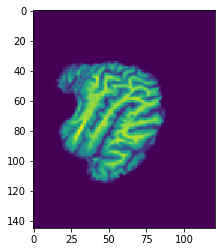

In [27]:
#Ad_image_X[0][0]
import matplotlib.pyplot as plt

##Let’s now look at a slice in that array:

plt.figure(1)
plt.imshow(Ad_image_X[25][25])#Ad_image_X[0][0]

##Let’s now look at a slice in that array:

In [28]:
cn=[]
for i in range(len(Adni_normal_image_X)):
    cn.append(Adni_normal_image_X[i][15:105])
    
    
mci=[]
for i in range(len(Mci_image_X)):
    mci.append(Mci_image_X[i][15:105])
ad=[]
for i in range(len(Ad_image_X)):
    ad.append(Ad_image_X[i][15:105])
    
del Adni_normal_image_X
del Mci_image_X
del Ad_image_X

In [29]:
Total_data_X=[]
Total_data_Y=[]
for i in range(len(ad)):
    Total_data_X.append(ad[i])
    Total_data_Y.append(2)
for i in range(len(mci)):
    Total_data_X.append(mci[i])
    Total_data_Y.append(1)
for i in range(len(cn)):
    Total_data_X.append(cn[i])
    Total_data_Y.append(0)
del ad
del cn
del mci

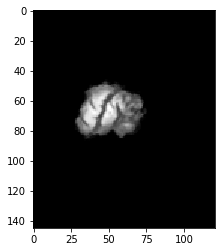

In [30]:
#Ad_image_X[0][0]
import matplotlib.pyplot as plt

##Let’s now look at a slice in that array:

plt.figure(1)
plt.imshow(Total_data_X[0][0],cmap = plt.get_cmap(name = 'gray'))
plt.show()

In [31]:
Newdata = np.asarray(Total_data_X)

In [32]:
Newdata.shape

(303, 90, 145, 121)

In [33]:


maindata=Newdata.reshape(len(Newdata)*90,145,121,1)
del Newdata
new_y=[]
for i in range (len(Total_data_X)):
    for j in range(90):
        new_y.append(Total_data_Y[i])
new_y=np.array(new_y)
del Total_data_X
del Total_data_Y

In [34]:
X_train, X_test, y_train, y_test = train_test_split(maindata, new_y, test_size=0.33)
del maindata

In [35]:
X_train.shape,y_train.shape

((18270, 145, 121, 1), (18270,))

In [37]:
from sklearn.utils import shuffle
x_train = X_train.astype('float32')
y_train = keras.utils.to_categorical(y_train)

#x_train, y_train = shuffle(x_train, y_train)

y_old_test=y_test
y_test = keras.utils.to_categorical(y_test)
def discriminator_model():
    ## Removed 
    ## 
    return model
#model=discriminator_model()
#print(model.summary())


In [43]:
model.compile(keras.optimizers.Adam(lr=1e-5), 'categorical_crossentropy', metrics=['acc'])
history=model.fit(x=x_train,y=y_train,batch_size=30, epochs=20,validation_split=0.1)

Train on 16443 samples, validate on 1827 samples
Epoch 1/20
16443/16443 [==============================] - 31s 2ms/step - loss: 0.9457 - acc: 0.5761 - val_loss: 0.7746 - val_acc: 0.7362
Epoch 2/20
16443/16443 [==============================] - 31s 2ms/step - loss: 0.5253 - acc: 0.8782 - val_loss: 0.4767 - val_acc: 0.9403
Epoch 3/20
16443/16443 [==============================] - 31s 2ms/step - loss: 0.4253 - acc: 0.9490 - val_loss: 0.4327 - val_acc: 0.9551
Epoch 4/20
16443/16443 [==============================] - 31s 2ms/step - loss: 0.3822 - acc: 0.9729 - val_loss: 0.3968 - val_acc: 0.9836
Epoch 5/20
16443/16443 [==============================] - 31s 2ms/step - loss: 0.3636 - acc: 0.9804 - val_loss: 0.3738 - val_acc: 0.9912
Epoch 6/20
16443/16443 [==============================] - 31s 2ms/step - loss: 0.3472 - acc: 0.9862 - val_loss: 0.3769 - val_acc: 0.9858
Epoch 7/20
16443/16443 [==============================] - 31s 2ms/step - loss: 0.3348 - acc: 0.9891 - val_loss: 0.3516 - val_acc:

In [44]:
del x_train
#X_test=np.array(X_test)
#x_test = X_test.reshape(X_test.shape[0]*121, 145,121,1)
x_test = X_test.astype('float32')
print(model.evaluate(x_test,y_test))

9000/9000 [==============================] - 4s 493us/step
[0.2790526786910163, 0.9971110820770264]


Text(0, 0.5, 'Accuracy')

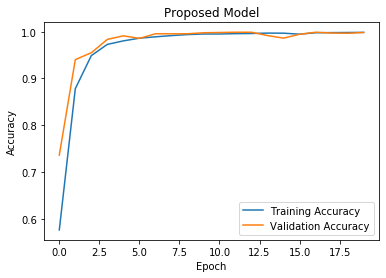

In [45]:
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.legend(['Training Accuracy' ,'Validation Accuracy'])
plt.title("Proposed Model")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")

In [46]:
y_pred=model.predict_classes(x_test)

In [47]:
y_test_old=np.array(y_old_test)

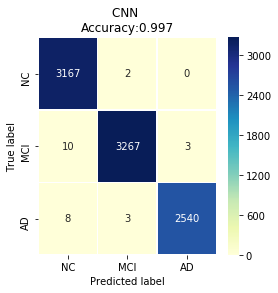

In [48]:
import pandas as pd
from sklearn.metrics import accuracy_score, confusion_matrix
cm = confusion_matrix(y_test_old, y_pred)

# Transform to df for easier plotting
cm_df = pd.DataFrame(cm,
                     index = ['NC','MCI','AD'], 
                     columns = ['NC','MCI','AD'])

plt.figure(figsize = (4,4))
sns.heatmap(cm_df, fmt = 'd' , cmap="YlGnBu",  annot=True, linewidths=.5)
plt.title('CNN \nAccuracy:{0:.3f}'.format(accuracy_score(y_test_old, y_pred)))
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

In [49]:
from sklearn.metrics import classification_report
target_names = ['NC', 'MCI', 'AD']
print(classification_report(y_test_old, y_pred, target_names=target_names))

              precision    recall  f1-score   support

          NC       0.99      1.00      1.00      3169
         MCI       1.00      1.00      1.00      3280
          AD       1.00      1.00      1.00      2551

    accuracy                           1.00      9000
   macro avg       1.00      1.00      1.00      9000
weighted avg       1.00      1.00      1.00      9000

